In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
x = data.loc[:, ['Spending Score (1-100)','Annual Income (k$)']].values
             
print(x.shape)

(200, 2)


In [6]:
x_data = pd.DataFrame(x)
x_data.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


0 - >spending score  1-> Annual income

## K means Clustering

In [9]:
#Elbow Method
from sklearn.cluster import KMeans

C:\Users\Isha Patil\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


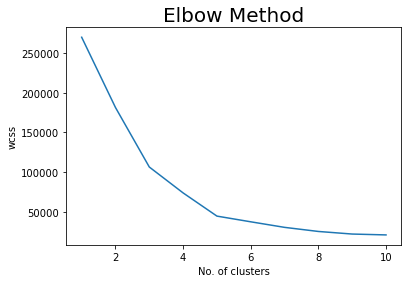

In [11]:
wcss = [] 

for i in range (1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)


plt.plot(range(1,11), wcss)
plt.title("Elbow Method", fontsize = 20)
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

k = 5

### Visualization of the clusters

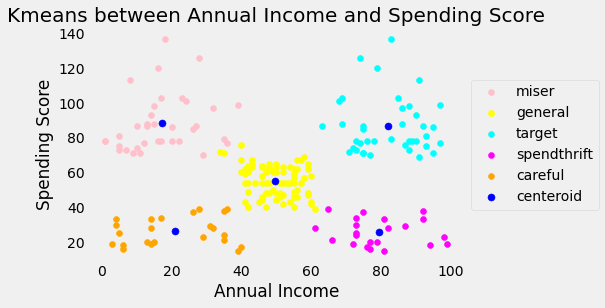

In [32]:
#Kmeans between Annual Income and Spending Score

km = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter (x[y_means == 0,0], x[y_means == 0,1], c= 'pink', label = 'miser')
plt.scatter (x[y_means == 1,0], x[y_means == 1,1], c= 'yellow', label = 'general')
plt.scatter (x[y_means == 2,0], x[y_means == 2,1], c= 'cyan', label = 'target')
plt.scatter (x[y_means == 3,0], x[y_means == 3,1], c= 'magenta', label = 'spendthrift')
plt.scatter (x[y_means == 4,0], x[y_means == 4,1], c= 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s= 50,c = 'blue', label = 'centeroid')

plt.title('Kmeans between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

C:\Users\Isha Patil\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


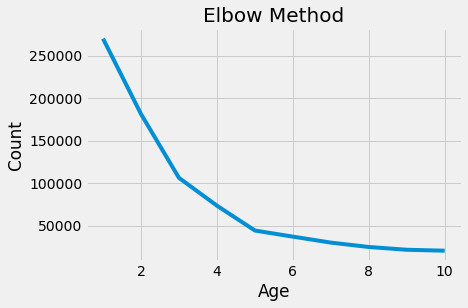

In [34]:
# Kmeans between age  and spending score
wcss = [] 

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss)
plt.title("Elbow Method", fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

k = 5

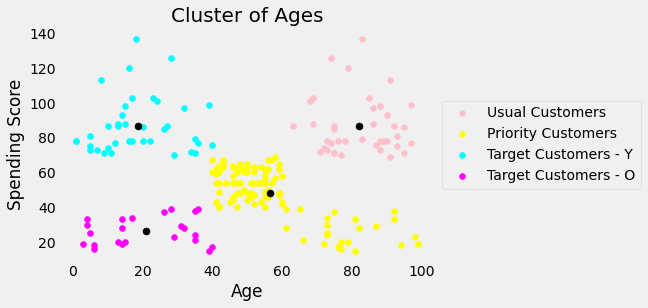

In [35]:
km = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter (x[y_means == 0,0], x[y_means == 0,1], c= 'pink', label = 'Usual Customers')
plt.scatter (x[y_means == 1,0], x[y_means == 1,1], c= 'yellow', label = 'Priority Customers')
plt.scatter (x[y_means == 2,0], x[y_means == 2,1], c= 'cyan', label = 'Target Customers - Y')
plt.scatter (x[y_means == 3,0], x[y_means == 3,1], c= 'magenta', label = 'Target Customers - O')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s= 50,c = 'black')

plt.title('Cluster of Ages', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()